## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.
D:\Anaconda3\envs\envirment_1\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda3\envs\envirment_1\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda3\envs\envirment_1\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda3\envs\envirment_1\lib\site-packages\tensorflow\python

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [14]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [15]:
"""Code Here
設定超參數
"""
epochs = 50
learning_rate = 0.001
batch_size = 1024
momentum = 0.95
patience = [5,10,25]

In [20]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""

from keras.callbacks import EarlyStopping

#es = EarlyStopping(moniter = 'val_acc',verbose = 1, patience = 5)
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for i in patience:
    keras.backend.clear_session()
    model = build_mlp(x_train.shape[1:])
    model.summary()
    opt = keras.optimizers.SGD(lr = learning_rate, momentum = momentum, nesterov = True)
    model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
    es = EarlyStopping(monitor = 'val_acc',verbose = 1, patience = i)
    model.fit(x_train,y_train , epochs = epochs , batch_size = batch_size, shuffle = True, validation_data =(x_test, y_test), callbacks=[es])
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    results['exper:es ='+str(i)] = {'train_loss':train_loss, 'valid_loss': valid_loss , 'train_acc':train_acc, 'valid_acc': valid_acc}

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512 

D:\Anaconda3\envs\envirment_1\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 8s 154us/step - loss: 1.7511 - accuracy: 0.3939 - val_loss: 1.9933 - val_accuracy: 0.2877
Epoch 3/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.6227 - accuracy: 0.4326 - val_loss: 1.8252 - val_accuracy: 0.3717
Epoch 4/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.5485 - accuracy: 0.4611 - val_loss: 1.7225 - val_accuracy: 0.4056
Epoch 5/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.4924 - accuracy: 0.4806 - val_loss: 1.6458 - val_accuracy: 0.4331
Epoch 6/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.4484 - accuracy: 0.4953 - val_loss: 1.5834 - val_accuracy: 0.4454
Epoch 7/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.4070 - accuracy: 0.5115 - val_loss: 1.5625 - val_accuracy: 0.4494
Epoch 8/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.3720 - accuracy: 0.5243 - val_loss: 1.530

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 189us/step - loss: 2.2147 - accuracy: 0.2706 - val_loss: 2.1348 - val_accuracy: 0.2432
Epoch 2/50


D:\Anaconda3\envs\envirment_1\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 10s 191us/step - loss: 1.7391 - accuracy: 0.3956 - val_loss: 1.9727 - val_accuracy: 0.3071
Epoch 3/50
50000/50000 [==============================] - 8s 167us/step - loss: 1.6145 - accuracy: 0.4363 - val_loss: 1.8189 - val_accuracy: 0.3735
Epoch 4/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.5430 - accuracy: 0.4602 - val_loss: 1.7145 - val_accuracy: 0.4014
Epoch 5/50
50000/50000 [==============================] - 9s 179us/step - loss: 1.4881 - accuracy: 0.4815 - val_loss: 1.6399 - val_accuracy: 0.4247
Epoch 6/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.4450 - accuracy: 0.4983 - val_loss: 1.6041 - val_accuracy: 0.4349
Epoch 7/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.4052 - accuracy: 0.5134 - val_loss: 1.5614 - val_accuracy: 0.4492
Epoch 8/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.3711 - accuracy: 0.5256 - val_loss: 1.53

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 168us/step - loss: 2.2503 - accuracy: 0.2706 - val_loss: 2.1650 - val_accuracy: 0.1807
Epoch 2/50
 1024/50000 [..............................] - ETA: 7s - loss: 1.8592 - accuracy: 0.3564

D:\Anaconda3\envs\envirment_1\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 9s 183us/step - loss: 1.7432 - accuracy: 0.3962 - val_loss: 1.9877 - val_accuracy: 0.2800
Epoch 3/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.6200 - accuracy: 0.4330 - val_loss: 1.8404 - val_accuracy: 0.3512
Epoch 4/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.5483 - accuracy: 0.4588 - val_loss: 1.7323 - val_accuracy: 0.3883
Epoch 5/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.4929 - accuracy: 0.4790 - val_loss: 1.6435 - val_accuracy: 0.4276
Epoch 6/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.4464 - accuracy: 0.4941 - val_loss: 1.5965 - val_accuracy: 0.4377
Epoch 7/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.4067 - accuracy: 0.5094 - val_loss: 1.5582 - val_accuracy: 0.4596
Epoch 8/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.3725 - accuracy: 0.5221 - val_loss: 1.53

In [19]:
model.history.history

{'val_loss': [2.0952888423919678,
  1.9706328695297242,
  1.8306290903091431,
  1.7121832406997681,
  1.6440042959213257,
  1.6068107803344727,
  1.5488342140197755,
  1.5183338384628295,
  1.4965836278915405,
  1.4988258312225342,
  1.490033031463623,
  1.4766779514312744,
  1.4781323030471802,
  1.4594909505844116,
  1.460507064819336,
  1.461199999809265,
  1.4689764417648314,
  1.4533281728744507,
  1.453794506072998,
  1.4493620208740234,
  1.4665896505355835,
  1.4512328475952148,
  1.4470741794586182,
  1.4882328622817993,
  1.4644229780197144,
  1.485828322982788,
  1.4760552282333375,
  1.499114670562744,
  1.4826915006637573,
  1.4744995447158813,
  1.4863474477767944,
  1.481294168663025,
  1.5052949865341188,
  1.5002299592971802,
  1.507629433822632,
  1.525021656036377,
  1.5240016696929932,
  1.5230864831924438,
  1.535450219154358,
  1.558716427230835,
  1.568144645690918,
  1.578933145904541,
  1.5811850008010864,
  1.595437791633606,
  1.6255077781677245,
  1.63252437

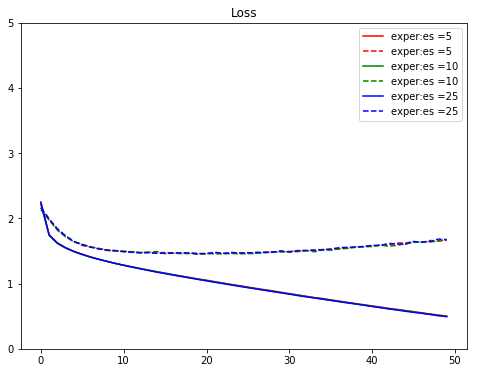

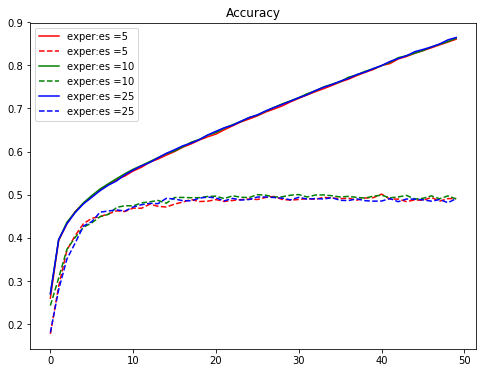

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])),results[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_loss'])),results[cond]['valid_loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])),results[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_acc'])),results[cond]['valid_acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()
